In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mpl_toolkits
import scipy.stats as st
from scipy.stats import linregress
from sklearn.model_selection import ShuffleSplit
%matplotlib inline

In [5]:
Data = pd.read_csv("cleaned.csv")
print("KC housing dataset has {} data points with {} variables each.".format(*Data.shape))

KC housing dataset has 2293 data points with 15 variables each.


In [6]:
Data.head()

,SOLD DATE,ADDRESS,ZIP OR POSTAL CODE,PRICE,BEDS,BATHS,LOCATION,SQUARE FEET,LOT SIZE,YEAR BUILT,DAYS ON MARKET,$/SQUARE FEET,HOA/MONTH,LATITUDE,LONGITUDE
0,May-6-2020,8415 SE Schwind Cir,98664,699999,1,1.0,VANCOUVER: THE HEIGHTS (SW),100,15245,1960,106,7000,0,45.601924,-122.590982
1,April-15-2020,7607 SE Harney St,97206,229500,1,1.0,BRENTWOOD,504,5662,1949,127,455,0,45.463471,-122.585376
2,June-12-2020,7220 NE 33rd Dr,97211,265000,2,1.0,PORTLAND NORTHEAST,572,11761,1944,69,463,0,45.575460,-122.632957
3,May-27-2020,6804 SE 77th Ave,97206,250000,1,1.0,BRENTWOOD,577,5662,1927,85,433,0,45.473382,-122.583730
4,February-28-2020,3134 NE 76th Ave,97213,234600,1,1.0,ROSEWAY,600,4791,1914,174,391,0,45.545134,-122.584665


In [7]:
Data.columns

Index(['SOLD DATE', 'ADDRESS', 'ZIP OR POSTAL CODE', 'PRICE', 'BEDS', 'BATHS',
       'LOCATION', 'SQUARE FEET', 'LOT SIZE', 'YEAR BUILT', 'DAYS ON MARKET',
       '$/SQUARE FEET', 'HOA/MONTH', 'LATITUDE', 'LONGITUDE'],
      dtype='object')

In [8]:
Data.describe()

,ZIP OR POSTAL CODE,PRICE,BEDS,BATHS,SQUARE FEET,LOT SIZE,YEAR BUILT,DAYS ON MARKET,$/SQUARE FEET,HOA/MONTH,LATITUDE,LONGITUDE
count,2293.000000,2.293000e+03,2293.000000,2293.000000,2293.000000,2293.000000,2293.000000,2293.000000,2293.000000,2293.000000,2293.000000,2293.000000
mean,97211.713912,5.693409e+05,3.208461,2.009376,2137.190144,5538.473615,1944.051897,81.493240,282.298735,1.221108,45.531120,-122.643574
std,31.820397,2.362861e+05,0.904795,0.832910,865.930185,4743.493387,34.850947,51.720981,157.598126,16.180819,0.039343,0.049362
min,97035.000000,2.190000e+05,1.000000,1.000000,100.000000,861.000000,1880.000000,1.000000,91.000000,0.000000,45.455898,-122.764945
25%,97206.000000,4.160000e+05,3.000000,1.000000,1506.000000,4356.000000,1919.000000,36.000000,231.000000,0.000000,45.498532,-122.684429
50%,97211.000000,5.170000e+05,3.000000,2.000000,2088.000000,4791.000000,1932.000000,76.000000,269.000000,0.000000,45.532089,-122.632720
75%,97215.000000,6.500000e+05,4.000000,2.500000,2603.000000,5662.000000,1957.000000,126.000000,316.000000,0.000000,45.564296,-122.604940
max,98664.000000,3.400000e+06,8.000000,6.000000,7088.000000,135907.000000,2020.000000,178.000000,7000.000000,454.000000,45.607584,-122.539143


In [9]:
Data.dtypes

SOLD DATE              object
ADDRESS                object
ZIP OR POSTAL CODE      int64
PRICE                   int64
BEDS                    int64
BATHS                 float64
LOCATION               object
SQUARE FEET             int64
LOT SIZE                int64
YEAR BUILT              int64
DAYS ON MARKET          int64
$/SQUARE FEET           int64
HOA/MONTH               int64
LATITUDE              float64
LONGITUDE             float64
dtype: object

In [10]:
Data = Data.drop(['SOLD DATE','ADDRESS','LOCATION'], axis=1)

In [11]:
Data.head()

,ZIP OR POSTAL CODE,PRICE,BEDS,BATHS,SQUARE FEET,LOT SIZE,YEAR BUILT,DAYS ON MARKET,$/SQUARE FEET,HOA/MONTH,LATITUDE,LONGITUDE
0,98664,699999,1,1.0,100,15245,1960,106,7000,0,45.601924,-122.590982
1,97206,229500,1,1.0,504,5662,1949,127,455,0,45.463471,-122.585376
2,97211,265000,2,1.0,572,11761,1944,69,463,0,45.575460,-122.632957
3,97206,250000,1,1.0,577,5662,1927,85,433,0,45.473382,-122.583730
4,97213,234600,1,1.0,600,4791,1914,174,391,0,45.545134,-122.584665


In [12]:
Data.isnull().sum()

ZIP OR POSTAL CODE    0
PRICE                 0
BEDS                  0
BATHS                 0
SQUARE FEET           0
LOT SIZE              0
YEAR BUILT            0
DAYS ON MARKET        0
$/SQUARE FEET         0
HOA/MONTH             0
LATITUDE              0
LONGITUDE             0
dtype: int64

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

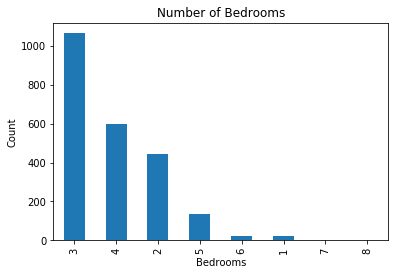

In [13]:
Data['BEDS'].value_counts().plot(kind='bar')
plt.title('Number of Bedrooms')
plt.xlabel('Bedrooms')
plt.ylabel('Count')
sns.despine

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

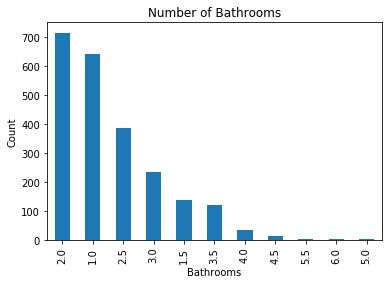

In [14]:
Data['BATHS'].value_counts().plot(kind='bar')
plt.title('Number of Bathrooms')
plt.xlabel('Bathrooms')
plt.ylabel('Count')
sns.despine

Text(0.5, 1.0, 'Price vs Square Feet')

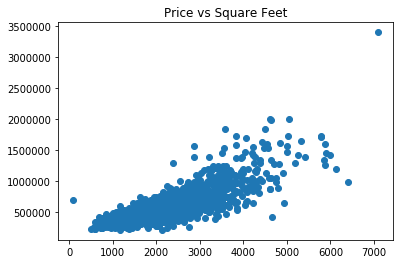

In [15]:
plt.scatter(Data['SQUARE FEET'],Data['PRICE'])
plt.title("Price vs Square Feet")

Text(0.5, 1.0, 'Price vs Square Feet')

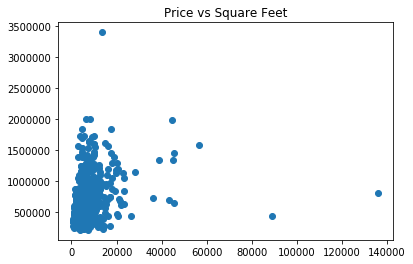

In [16]:
plt.scatter(Data['LOT SIZE'],Data['PRICE'])
plt.title("Price vs Square Feet")

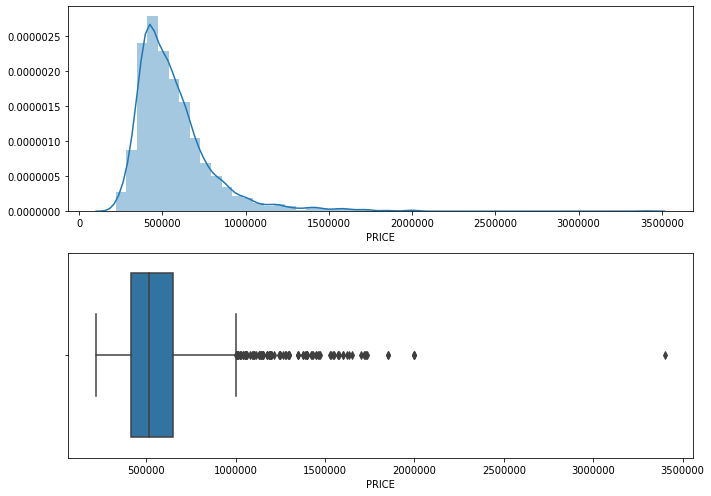

In [18]:
fig = plt.figure(figsize=(10,7))
fig.add_subplot(2,1,1)
sns.distplot(Data['PRICE'])
fig.add_subplot(2,1,2)
sns.boxplot(Data['PRICE'])
plt.tight_layout()

In [19]:
top = Data.sort_values('PRICE',ascending = False).iloc[216:]

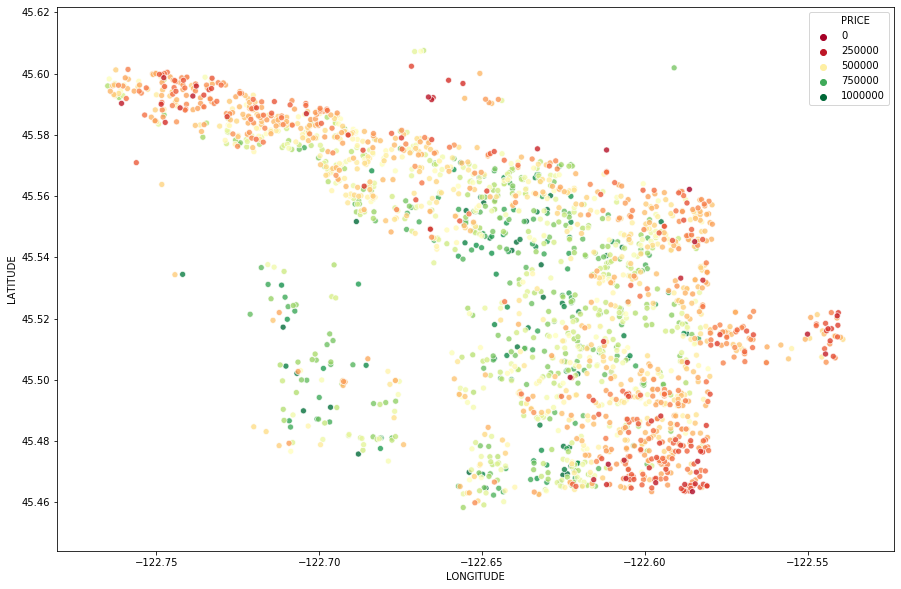

In [47]:
plt.figure(figsize=(15,10))
sns.scatterplot(x='LONGITUDE',y='LATITUDE',data=top,alpha = 0.8,palette = 'RdYlGn', hue='PRICE')
plt.savefig('long-lat.png')

## Linear Regression

In [21]:
from sklearn.linear_model import LinearRegression

In [22]:
model = LinearRegression()

In [23]:
y = Data['PRICE'].values.reshape(-1, 1)
X = Data.drop(['PRICE'], axis=1)
print(X.shape, y.shape)

(2293, 11) (2293, 1)


In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=40)

In [25]:
from sklearn.preprocessing import StandardScaler
s_scaler = StandardScaler()
X_train = s_scaler.fit_transform(X_train.astype(np.float))
X_test = s_scaler.transform(X_test.astype(np.float))

In [26]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [27]:
model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
print(f"Training Score: {training_score}")

Training Score: 0.9215741140721599


In [28]:
print('Linear Regression Model:')
print("Train Score {:.2f}".format(model.score(X_train,y_train)))
print("Test Score {:.2f}".format(model.score(X_test, y_test)))

Linear Regression Model:
Train Score 0.92
Test Score -1.43


## Multiple Linear Regression

In [29]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

#evaluate the model (intercept and slope)
regressor.intercept_
regressor.coef_

array([[-1.26170257e+03, -5.11900982e+03,  2.45772639e+04,
         2.30689794e+05, -1.07577531e+03,  1.69772385e+02,
        -2.09799151e+03,  1.19900908e+05, -3.80811634e+03,
        -4.24525923e+03, -4.57357004e+03]])

In [30]:
y_predd = regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test[0], 'Predicted': y_predd[0]})
df1 = df.head(10)
df1

,Actual,Predicted
0,528000,543416.994321


In [31]:
from sklearn import metrics

print('Mean Absolute Error: {:.2f}'.format(metrics.mean_absolute_error(y_test, y_predd))) 
print('Mean Squared Error:{:.2f}'.format(metrics.mean_squared_error(y_test, y_predd)))  
print('Root Mean Squared Error:{:.2f}'.format(np.sqrt(metrics.mean_squared_error(y_test, y_predd))))
print('Variance score is: {:.2f}'.format(metrics.explained_variance_score(y_test,y_predd)))

Mean Absolute Error: 58451.49
Mean Squared Error:153902548541.47
Root Mean Squared Error:392304.15
Variance score is: -1.43


## Keras Regression

In [33]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

In [34]:
model = Sequential()

model.add(Dense(12,activation='relu'))
model.add(Dense(12,activation='relu'))
model.add(Dense(12,activation='relu'))
model.add(Dense(12,activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

In [35]:
model.fit(x=X_train,y=y_train,
          validation_data=(X_test,y_test),
          batch_size=128,epochs=400)

Epoch 1/400
12/12 [==============================] - 0s 16ms/step - loss: 375764975616.0000 - val_loss: 388457857024.0000
Epoch 2/400
12/12 [==============================] - 0s 3ms/step - loss: 375764713472.0000 - val_loss: 388457496576.0000
Epoch 3/400
12/12 [==============================] - 0s 3ms/step - loss: 375764320256.0000 - val_loss: 388456906752.0000
Epoch 4/400
12/12 [==============================] - 0s 4ms/step - loss: 375763730432.0000 - val_loss: 388456120320.0000
Epoch 5/400
12/12 [==============================] - 0s 3ms/step - loss: 375762812928.0000 - val_loss: 388454875136.0000
Epoch 6/400
12/12 [==============================] - 0s 3ms/step - loss: 375761403904.0000 - val_loss: 388453040128.0000
Epoch 7/400
12/12 [==============================] - 0s 3ms/step - loss: 375759405056.0000 - val_loss: 388450222080.0000
Epoch 8/400
12/12 [==============================] - 0s 3ms/step - loss: 375756259328.0000 - val_loss: 388445962240.0000
Epoch 9/400
12/12 [============

12/12 [==============================] - 0s 3ms/step - loss: 81733648384.0000 - val_loss: 248647974912.0000
Epoch 69/400
12/12 [==============================] - 0s 3ms/step - loss: 76945874944.0000 - val_loss: 257100070912.0000
Epoch 70/400
12/12 [==============================] - 0s 3ms/step - loss: 72740610048.0000 - val_loss: 265580380160.0000
Epoch 71/400
12/12 [==============================] - 0s 3ms/step - loss: 69013438464.0000 - val_loss: 274048073728.0000
Epoch 72/400
12/12 [==============================] - 0s 3ms/step - loss: 65995231232.0000 - val_loss: 282558562304.0000
Epoch 73/400
12/12 [==============================] - 0s 3ms/step - loss: 63192322048.0000 - val_loss: 289844789248.0000
Epoch 74/400
12/12 [==============================] - 0s 3ms/step - loss: 60928884736.0000 - val_loss: 298080141312.0000
Epoch 75/400
12/12 [==============================] - 0s 3ms/step - loss: 58860867584.0000 - val_loss: 305079058432.0000
Epoch 76/400
12/12 [=========================

12/12 [==============================] - 0s 3ms/step - loss: 26484998144.0000 - val_loss: 400085549056.0000
Epoch 136/400
12/12 [==============================] - 0s 3ms/step - loss: 26218776576.0000 - val_loss: 400615538688.0000
Epoch 137/400
12/12 [==============================] - 0s 3ms/step - loss: 25940797440.0000 - val_loss: 402766135296.0000
Epoch 138/400
12/12 [==============================] - 0s 3ms/step - loss: 25675958272.0000 - val_loss: 403451707392.0000
Epoch 139/400
12/12 [==============================] - 0s 3ms/step - loss: 25412184064.0000 - val_loss: 404554252288.0000
Epoch 140/400
12/12 [==============================] - 0s 3ms/step - loss: 25146841088.0000 - val_loss: 406045458432.0000
Epoch 141/400
12/12 [==============================] - 0s 3ms/step - loss: 24891824128.0000 - val_loss: 406307635200.0000
Epoch 142/400
12/12 [==============================] - 0s 3ms/step - loss: 24639971328.0000 - val_loss: 407694278656.0000
Epoch 143/400
12/12 [=================

12/12 [==============================] - 0s 3ms/step - loss: 13372259328.0000 - val_loss: 450479947776.0000
Epoch 203/400
12/12 [==============================] - 0s 3ms/step - loss: 13241949184.0000 - val_loss: 450125922304.0000
Epoch 204/400
12/12 [==============================] - 0s 3ms/step - loss: 13107007488.0000 - val_loss: 451797581824.0000
Epoch 205/400
12/12 [==============================] - 0s 3ms/step - loss: 12977527808.0000 - val_loss: 452255219712.0000
Epoch 206/400
12/12 [==============================] - 0s 3ms/step - loss: 12850750464.0000 - val_loss: 452104290304.0000
Epoch 207/400
12/12 [==============================] - 0s 3ms/step - loss: 12721359872.0000 - val_loss: 453468651520.0000
Epoch 208/400
12/12 [==============================] - 0s 3ms/step - loss: 12598125568.0000 - val_loss: 452857823232.0000
Epoch 209/400
12/12 [==============================] - 0s 3ms/step - loss: 12470521856.0000 - val_loss: 453499879424.0000
Epoch 210/400
12/12 [=================

12/12 [==============================] - 0s 3ms/step - loss: 7417503232.0000 - val_loss: 455085424640.0000
Epoch 270/400
12/12 [==============================] - 0s 3ms/step - loss: 7363739648.0000 - val_loss: 453816418304.0000
Epoch 271/400
12/12 [==============================] - 0s 3ms/step - loss: 7310217216.0000 - val_loss: 453351833600.0000
Epoch 272/400
12/12 [==============================] - 0s 3ms/step - loss: 7253851648.0000 - val_loss: 452995055616.0000
Epoch 273/400
12/12 [==============================] - 0s 3ms/step - loss: 7201064960.0000 - val_loss: 451500113920.0000
Epoch 274/400
12/12 [==============================] - 0s 3ms/step - loss: 7146014720.0000 - val_loss: 451884056576.0000
Epoch 275/400
12/12 [==============================] - 0s 3ms/step - loss: 7095779328.0000 - val_loss: 451116302336.0000
Epoch 276/400
12/12 [==============================] - 0s 3ms/step - loss: 7044112384.0000 - val_loss: 450800386048.0000
Epoch 277/400
12/12 [=========================

Epoch 337/400
12/12 [==============================] - 0s 3ms/step - loss: 5169474560.0000 - val_loss: 407877222400.0000
Epoch 338/400
12/12 [==============================] - 0s 3ms/step - loss: 5152188928.0000 - val_loss: 406673162240.0000
Epoch 339/400
12/12 [==============================] - 0s 3ms/step - loss: 5135429120.0000 - val_loss: 405078376448.0000
Epoch 340/400
12/12 [==============================] - 0s 3ms/step - loss: 5122592256.0000 - val_loss: 405281570816.0000
Epoch 341/400
12/12 [==============================] - 0s 3ms/step - loss: 5102157824.0000 - val_loss: 403777224704.0000
Epoch 342/400
12/12 [==============================] - 0s 3ms/step - loss: 5085777408.0000 - val_loss: 402427740160.0000
Epoch 343/400
12/12 [==============================] - 0s 3ms/step - loss: 5073078784.0000 - val_loss: 403394035712.0000
Epoch 344/400
12/12 [==============================] - 0s 3ms/step - loss: 5056763904.0000 - val_loss: 400613441536.0000
Epoch 345/400
12/12 [===========

In [36]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 12)                144       
_________________________________________________________________
dense_1 (Dense)              (None, 12)                156       
_________________________________________________________________
dense_2 (Dense)              (None, 12)                156       
_________________________________________________________________
dense_3 (Dense)              (None, 12)                156       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 13        
Total params: 625
Trainable params: 625
Non-trainable params: 0
_________________________________________________________________


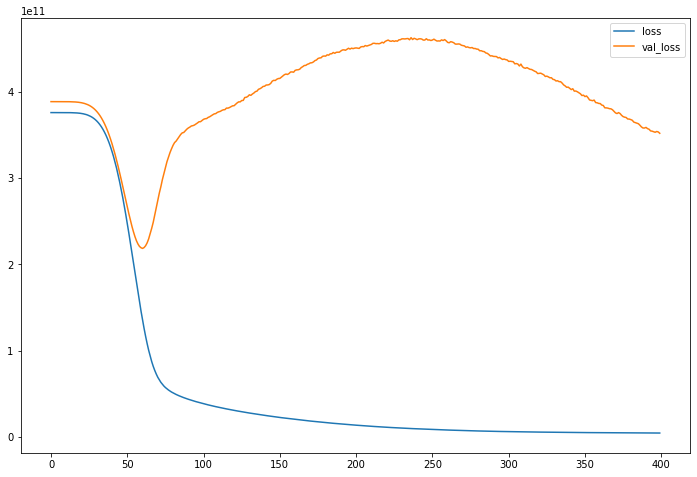

In [37]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot(figsize=(12,8))

In [38]:
y_pred = model.predict(X_test)

In [39]:
from sklearn import metrics

print('Mean Absolute Error: {:.2f}'.format(metrics.mean_absolute_error(y_test, y_pred)))
print('Mean Squared Error: {:.2f}'.format(metrics.mean_squared_error(y_test, y_pred)))
print('Root Mean Squared Error: {:.2f}'.format(np.sqrt(metrics.mean_squared_error(y_test, y_pred))))
print('Variance score is: {:.2f}'.format(metrics.explained_variance_score(y_test,y_pred)))

Mean Absolute Error: 69884.79
Mean Squared Error: 351789399182.07
Root Mean Squared Error: 593118.37
Variance score is: -4.56


## Testing the Models

In [40]:
house = Data.drop('PRICE',axis = 1).iloc[1]

In [42]:
house = s_scaler.transform(house.values.reshape(-1,11))

In [43]:
model.predict(house)

array([[424583.78]], dtype=float32)

In [45]:
Data['PRICE'][1]

229500

In [46]:
print('Model: Keras Regression\n')

print('Mean Absolute Error(MAE): {:.2f}'.format(metrics.mean_absolute_error(y_test, y_pred)))
print('Mean Squared Error(MSE): {:.2f}'.format(metrics.mean_squared_error(y_test, y_pred)))
print('Root Mean Squared Error(RMSE): {:.2f}'.format(np.sqrt(metrics.mean_squared_error(y_test, y_pred))))
print('Variance score: {:.2f}\n'.format(metrics.explained_variance_score(y_test,y_pred)*100))
print('*********************************\n')
print('Model: Multiple Linear Regression\n')
print('Mean Absolute Error(MAE): {:.2f}'.format(metrics.mean_absolute_error(y_test, y_predd))) 
print('Mean Squared Error(MSE):{:.2f}'.format(metrics.mean_squared_error(y_test, y_predd)))  
print('Root Mean Squared Error(RMSE):{:.2f}'.format(np.sqrt(metrics.mean_squared_error(y_test, y_predd))))
print('Variance score: {:.2f}'.format(metrics.explained_variance_score(y_test,y_predd)*100))

Model: Keras Regression

Mean Absolute Error(MAE): 69884.79
Mean Squared Error(MSE): 351789399182.07
Root Mean Squared Error(RMSE): 593118.37
Variance score: -455.94

*********************************

Model: Multiple Linear Regression

Mean Absolute Error(MAE): 58451.49
Mean Squared Error(MSE):153902548541.47
Root Mean Squared Error(RMSE):392304.15
Variance score: -143.24
